In [16]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [18]:
data_path = '/content/gdrive/My Drive/DS Project/datasets/cured_trendLineCoeff.csv'
data = pd.read_csv(data_path)

In [19]:
data.columns = ['index','State/UnionTerrirory','TrendLineCoeff']
data.head()


,index,State/UnionTerrirory,TrendLineCoeff
0,0,Andhra Pradesh,2635.462548
1,1,Himachal Pradesh,43.999978
2,2,Odisha,729.289817
3,3,Madhya Pradesh,450.156489
4,4,Nagaland,38.851198


In [20]:
#Creating the data 
x1 = np.array(data['index']) 
x2 = np.array(data['TrendLineCoeff']) 
x3 = np.array(data['State/UnionTerrirory'])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 

In [21]:
max(x2),len(x1)

(4581.838098951673, 36)

In [22]:
states_dict = dict(zip(list(x1),list(x3)))
states_dict


{0: 'Andhra Pradesh',
 1: 'Himachal Pradesh',
 2: 'Odisha',
 3: 'Madhya Pradesh',
 4: 'Nagaland',
 5: 'Manipur',
 6: 'Delhi',
 7: 'Mizoram',
 8: 'Gujarat',
 9: 'Maharashtra',
 10: 'Andaman and Nicobar Islands',
 11: 'Jammu and Kashmir',
 12: 'Kerala',
 13: 'Meghalaya',
 14: 'Goa',
 15: 'West Bengal',
 16: 'Ladakh',
 17: 'Uttarakhand',
 18: 'Haryana',
 19: 'Karnataka',
 20: 'Puducherry',
 21: 'Assam',
 22: 'Rajasthan',
 23: 'Uttar Pradesh',
 24: 'Jharkhand',
 25: 'Arunachal Pradesh',
 26: 'Chhattisgarh',
 27: 'Tamil Nadu',
 28: 'Tripura',
 29: 'Dadar Nagar Haveli',
 30: 'Daman & Diu',
 31: 'Sikkim',
 32: 'Bihar',
 33: 'Telangana',
 34: 'Chandigarh',
 35: 'Punjab'}

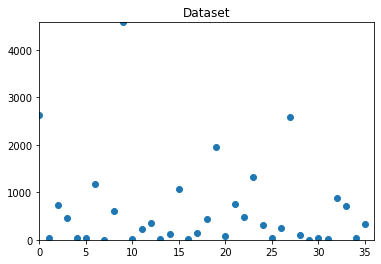

In [23]:


#Visualizing the data 
plt.plot() 
plt.xlim([0, 36]) 
plt.ylim([0, max(x2)]) 
plt.title('Dataset') 
plt.scatter(x1, x2) 
plt.show() 


In [24]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 

for k in K: 
	#Building and fitting the model 
	kmeanModel = KMeans(n_clusters=k).fit(X) 
	kmeanModel.fit(X)	 
	
	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
					'euclidean'),axis=1)) / X.shape[0]) 
	inertias.append(kmeanModel.inertia_) 

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
				'euclidean'),axis=1)) / X.shape[0] 
	mapping2[k] = kmeanModel.inertia_ 

for key,val in mapping1.items(): 
	print(str(key)+' : '+str(val)) 


1 : 637.8895826117378
2 : 363.3215206144833
3 : 284.1607243342256
4 : 163.91073863195433
5 : 110.55840053795002
6 : 74.97414482032684
7 : 51.883237986832185
8 : 43.72410041911934
9 : 38.82171620241167


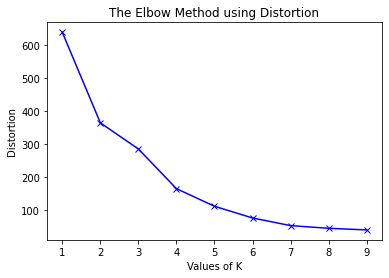

In [25]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


In [26]:
for key,val in mapping2.items(): 
	print(str(key)+' : '+str(val)) 


1 : 32416166.10675534
2 : 8341542.083079639
3 : 4580709.742909451
4 : 1348656.1674592525
5 : 760424.0791136475
6 : 454198.53158622474
7 : 162734.36327736994
8 : 110623.6009658557
9 : 81747.37646822169


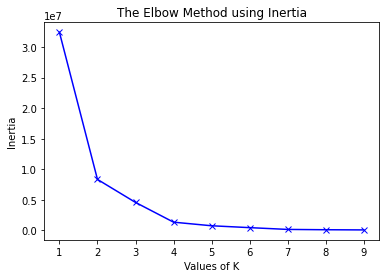

In [27]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 


k=4 here??

In [28]:
#According to the Elbow graph we deterrmine the k as 4. Applying k-means algorithm to the X dataset.
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

# We are going to use the fit predict method that returns for each 
#observation which cluster it belongs to. The cluster to which 
#client belongs and it will return this cluster numbers into a 
#single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(X)
y_kmeans,len(y_kmeans)

(array([2, 0, 3, 0, 0, 0, 3, 0, 3, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 3,
        0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0, 0], dtype=int32), 36)

In [29]:
clusters = {}
index = 0
for cur_cluster in y_kmeans:
  clusters[states_dict[index]] = cur_cluster
  index += 1
clusters

{'Andaman and Nicobar Islands': 0,
 'Andhra Pradesh': 2,
 'Arunachal Pradesh': 0,
 'Assam': 3,
 'Bihar': 3,
 'Chandigarh': 0,
 'Chhattisgarh': 0,
 'Dadar Nagar Haveli': 0,
 'Daman & Diu': 0,
 'Delhi': 3,
 'Goa': 0,
 'Gujarat': 3,
 'Haryana': 0,
 'Himachal Pradesh': 0,
 'Jammu and Kashmir': 0,
 'Jharkhand': 0,
 'Karnataka': 2,
 'Kerala': 0,
 'Ladakh': 0,
 'Madhya Pradesh': 0,
 'Maharashtra': 1,
 'Manipur': 0,
 'Meghalaya': 0,
 'Mizoram': 0,
 'Nagaland': 0,
 'Odisha': 3,
 'Puducherry': 0,
 'Punjab': 0,
 'Rajasthan': 0,
 'Sikkim': 0,
 'Tamil Nadu': 2,
 'Telangana': 3,
 'Tripura': 0,
 'Uttar Pradesh': 3,
 'Uttarakhand': 0,
 'West Bengal': 3}

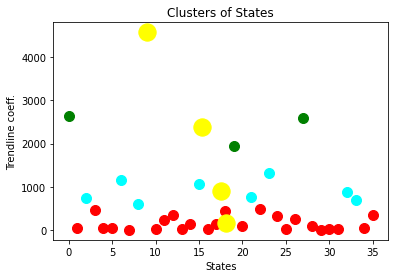

In [30]:
#Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of States')
plt.xlabel('States')
plt.ylabel('Trendline coeff.')
plt.show()

Yellow dots in above fig. are centroids of each clusters